# Análise do IDEB 2019 - Ensino Médio

## Índice

<ul>
    <li>Introdução
    <li>Manipulação dos dados
    <li>Análise de Dados
    <li>Conclusões</li>
</ul>

## Introdução
O Indicador de Desenvolvimento da Educação Básica (IDEB) consiste em um cálculo o qual relaciona dados de aprendizagem e fluxo escolar, obtidos respectivamente através da avaliação do SAEB e do Censo Escolar.
O SAEB é aplicado a cada dois anos e assim, temos o resultado do IDEB também calculado a cada dois anos.
Para o Ensino Médio, o SAEB passou a ser censitário a partir de 2017 e assim temos os resultados por escola apenas de 2017 e 2019. 
<br>
<br>

<b> SG_UF - </b> 	Sigla do estado <br>
<b> CO_MUNICIPIO - </b> 	Código IBGE do município <br>
<b> NO_MUNICIPIO - </b> Nome do município <br>
<b> ID_ESCOLA	- </b> Código INEP da escola <br>
<b> REDE - </b> Dependência administrativa da escola (Municipal, Estadual, Privada) <br>
<b> VL_INDICADOR_REND_2017	- </b> Indicador de rendimento 2017 (Fluxo) <br>
<b> VL_INDICADOR_REND_2019	- </b> Indicador de rendimento 2019 (Fluxo) <br>
<b> VL_NOTA_MEDIA_2017	- </b> Nota padronizada 2017 (SAEB) <br>
<b> VL_NOTA_MEDIA_2019	- </b> Nota padronizada 2019 (SAEB) <br>
<b> VL_OBSERVADO_2017		- </b> Resultado do IDEB 2017 (SAEB) <br>
<b> VL_OBSERVADO_2019	- </b> Resultado do IDEB 2019 (SAEB) <br>
<b> VL_PROJECAO_2019 - </b> Meta do IDEB 2019 (SAEB) <br>

---

## Manipulação dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel('/content/drive/My Drive/Educação/SAEB 2019/divulgacao_ensino_medio_escolas_2019.xlsx')

In [2]:
df.loc[:,'VL_INDICADOR_REND_2017'] = pd.to_numeric(df.loc[:,'VL_INDICADOR_REND_2017'], errors='coerce')
df.loc[:,'VL_INDICADOR_REND_2019'] = pd.to_numeric(df.loc[:,'VL_INDICADOR_REND_2019'], errors='coerce')
df.loc[:, 'VL_NOTA_MEDIA_2017'] = pd.to_numeric(df.loc[:,'VL_NOTA_MEDIA_2017'], errors='coerce')
df.loc[:,'VL_NOTA_MEDIA_2019'] = pd.to_numeric(df.loc[:,'VL_NOTA_MEDIA_2019'], errors='coerce')
df.loc[:, 'VL_OBSERVADO_2017'] = pd.to_numeric(df.loc[:,'VL_OBSERVADO_2017'], errors='coerce')
df.loc[:, 'VL_OBSERVADO_2019'] = pd.to_numeric(df.loc[:,'VL_OBSERVADO_2019'], errors='coerce')
df.loc[:,'VL_PROJECAO_2019'] = pd.to_numeric(df.loc[:,'VL_PROJECAO_2019'], errors='coerce')

In [3]:
ideb = df.loc[:,['SG_UF','CO_MUNICIPIO','NO_MUNICIPIO','ID_ESCOLA','REDE','VL_INDICADOR_REND_2017','VL_INDICADOR_REND_2019',
          'VL_NOTA_MEDIA_2017','VL_NOTA_MEDIA_2019','VL_OBSERVADO_2017','VL_OBSERVADO_2019','VL_PROJECAO_2019']]

In [4]:
ideb_2019 = ideb.dropna(subset = ['VL_OBSERVADO_2019'])

<a id='#add'></a>
## Análise de Dados

### Percentual de escolas com resultado divulgado

In [5]:
ideb_2019.shape[0]/ideb.shape[0]

0.5833011396561715

### Estatísticas

In [6]:
ideb_2019.describe()

,CO_MUNICIPIO,ID_ESCOLA,VL_INDICADOR_REND_2017,VL_INDICADOR_REND_2019,VL_NOTA_MEDIA_2017,VL_NOTA_MEDIA_2019,VL_OBSERVADO_2017,VL_OBSERVADO_2019,VL_PROJECAO_2019
count,1.207900e+04,1.207900e+04,11497.000000,12079.000000,6692.000000,12079.000000,6692.000000,12079.000000,6692.000000
mean,3.184799e+06,3.181058e+07,0.852352,0.892792,4.459122,4.657422,3.935415,4.172986,4.149268
std,8.748289e+05,8.718608e+06,0.100394,0.085439,0.669153,0.673850,0.791066,0.804079,0.781281
min,1.100015e+06,1.100026e+07,0.242294,0.386894,1.350903,1.951648,1.100000,1.300000,1.200000
25%,2.606254e+06,2.606904e+07,0.791884,0.845394,4.003055,4.215383,3.400000,3.600000,3.600000
50%,3.167202e+06,3.125436e+07,0.866065,0.910990,4.416458,4.638441,3.900000,4.200000,4.100000
75%,3.548906e+06,3.540628e+07,0.929797,0.959401,4.843771,5.049680,4.400000,4.700000,4.600000
max,5.300108e+06,5.306809e+07,1.000000,1.000000,7.800014,7.774514,7.700000,7.700000,7.800000


### Percentual de escolas com meta batida

In [7]:
meta_2019 = ideb_2019.dropna(subset = ['VL_PROJECAO_2019'])
(meta_2019['VL_OBSERVADO_2019'] >= meta_2019['VL_PROJECAO_2019']).mean()

0.6872384937238494

### Distribuição dos resultados 2019

Text(0.5, 0, 'ideb 2019')

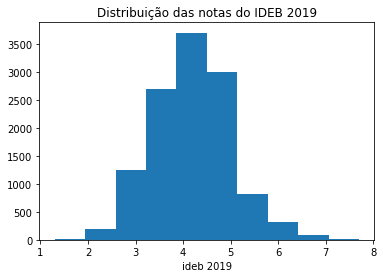

In [8]:
plt.hist(ideb_2019['VL_OBSERVADO_2019'])
plt.title('Distribuição das notas do IDEB 2019')
plt.xlabel('ideb 2019')

### Junção com a base do Indicador de Nível Socioeconômico das Escolas de Educação Básica

In [9]:
df_2 = pd.read_excel('/content/drive/My Drive/Educação/SAEB 2019/INSE_2015.xlsx')
inse = df_2.loc[:, ['CO_ESCOLA', 'INSE_CLASSIFICACAO']]
inse.columns = ['ID_ESCOLA', 'INSE_CLASSIFICACAO']

In [10]:
inse['ID_ESCOLA'] = inse['ID_ESCOLA'].astype(int)

In [11]:
ideb_2019_inse = ideb_2019.merge(inse, on='ID_ESCOLA')

### Média por grupo de classificação do INSE

In [12]:
ideb_2019_inse.groupby('INSE_CLASSIFICACAO')['VL_OBSERVADO_2019'].mean()

INSE_CLASSIFICACAO
Grupo 1    4.022474
Grupo 2    4.060263
Grupo 3    4.129146
Grupo 4    4.470241
Grupo 5    5.126207
Grupo 6    6.875000
Name: VL_OBSERVADO_2019, dtype: float64

### Mediana por grupo de classificação do INSE

In [13]:
ideb_2019_inse.groupby('INSE_CLASSIFICACAO')['VL_OBSERVADO_2019'].median()

INSE_CLASSIFICACAO
Grupo 1    4.00
Grupo 2    4.00
Grupo 3    4.10
Grupo 4    4.40
Grupo 5    5.00
Grupo 6    6.65
Name: VL_OBSERVADO_2019, dtype: float64

### Desvio padrão por grupo de classificação do INSE

In [14]:
ideb_2019_inse.groupby('INSE_CLASSIFICACAO')['VL_OBSERVADO_2019'].std()

INSE_CLASSIFICACAO
Grupo 1    0.702103
Grupo 2    0.781685
Grupo 3    0.690266
Grupo 4    0.690597
Grupo 5    0.861572
Grupo 6    0.597016
Name: VL_OBSERVADO_2019, dtype: float64

### Distribuição das notas do IDEB por grupo do INSE

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7895e902b0>,
      dtype=object)

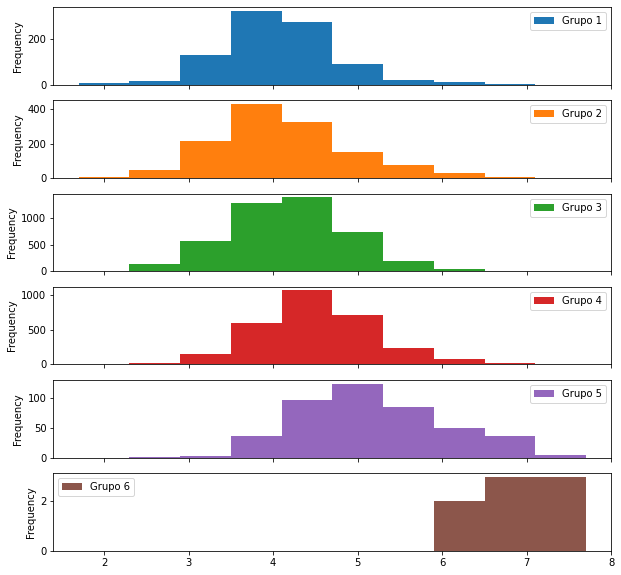

In [15]:
ideb_2019_inse.pivot(columns='INSE_CLASSIFICACAO', values='VL_OBSERVADO_2019').plot(kind='hist', subplots=True, figsize=(10,10))

## Conclusão